# Машинное обучение, ВМК МГУ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 08.10.2021

Мягкий дедлайн: 23:59MSK 22.10.2021

Жесткий дедлайн: 23:59MSK 29.10.2021

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также будем использовать `seaborn` и научимся `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **12 баллов + 4.8 бонусов**. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.5 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip3 install folium

In [ ]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. 

Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [3]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [129]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

**(0.1 балл)** Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [131]:
data = data.drop('dropoff_datetime', 1)

In [130]:
import datetime


data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

**(0.2 балла)** В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

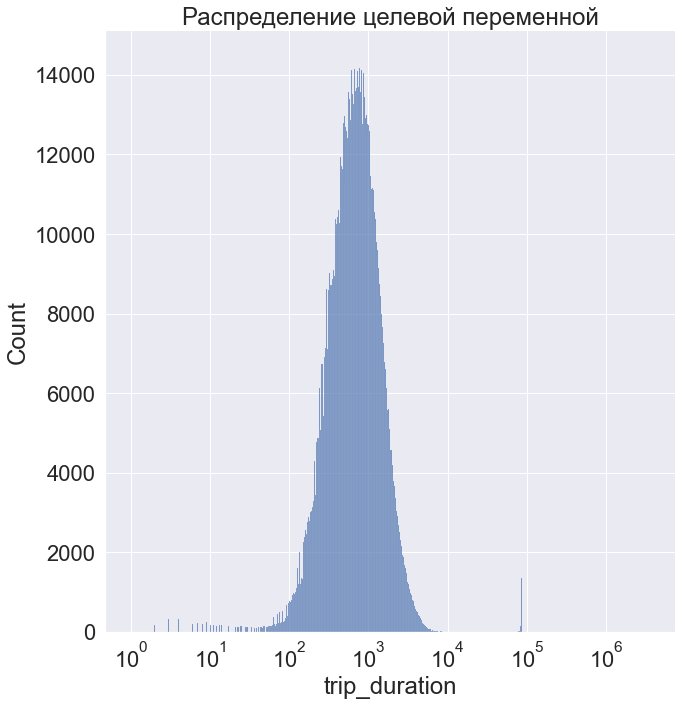

In [ ]:
import warnings
warnings.simplefilter("ignore")
sns.set(font_scale=2)
sns.displot(data=data, x='trip_duration', log_scale=True, kind='hist', height=10).set(title="Распределение целевой переменной")

**Вопрос (0.1 балл)**: **(?)**Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: 
целевая переменная распределена нормально, но есть объекты с очень маленькими или очень большими значениями (выбросы)

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос (0.1 балл)**: **(?)**Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: 
по гистограмме видно, что в выборке присутствуют выбросы, а метрика RMSLE к ним более устойчива, чем RMSE

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос (0.3 балла)**: **(?)**Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: Напишие прямо тут в ячейке, при необходимости использовав синтаксис LaTeX в ячейке

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell}\big(\log{(y_i+1)}-\log{(a(x_i)+1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell}\big(\log{(y_i+1)}-\log{(\exp(\hat{a}(x_i)) - 1+1)}\big)^2} =\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell}\big(\hat{y}_i-\log{(\exp(\hat{a}(x_i))}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell}\big(\hat{y}_i-\hat{a}(x_i)\big)^2} = \text{RMSE}(X, \hat{y}, \hat{a}) = \sqrt{\text{MSE}} \Rightarrow \text{Минимизация MSE равносильна минимизации RMSE} $$


**(0.1 балл)** Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [132]:
data['log_trip_duration'] = np.log1p(data['trip_duration'])
data.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527


<Figure size 576x576 with 0 Axes>

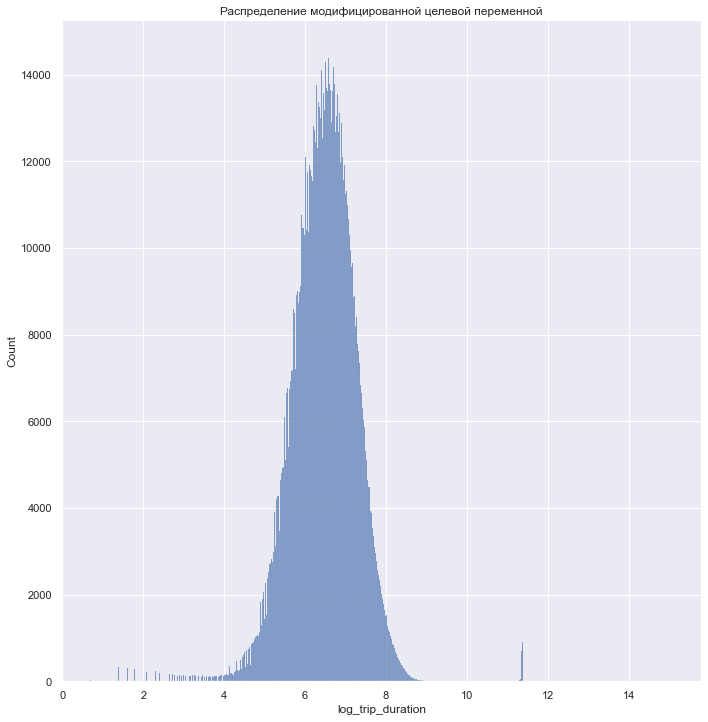

In [ ]:
plt.figure(figsize=(8,8))
sns.displot(data=data, x='log_trip_duration', kind='hist', height=10).set(title="Распределение модифицированной целевой переменной")

In [133]:
from copy import copy

data = data.drop('trip_duration', 1)
data.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527


**(0.1 балл)** Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики MSE при наилучшем константном предсказании:

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error


best_constant = data['log_trip_duration'].mean()
mean_squared_error(data['log_trip_duration'], best_constant * np.ones(data['log_trip_duration'].shape), squared=True)

0.6332327625405546

## Часть 1. Изучаем `pickup_datetime` (4 балла)

**Задание 2 (0.5 баллов)**.

**(0.25 баллов)** Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [ ]:
from copy import copy

days = copy(data)
days['yeardays'] = data['pickup_datetime'].apply(lambda x: int(x.strftime("%j")))

In [ ]:
days1 = days.set_index('yeardays')
days1.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
yeardays,,,,,,,,,,
74,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
164,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
19,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
97,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
86,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642


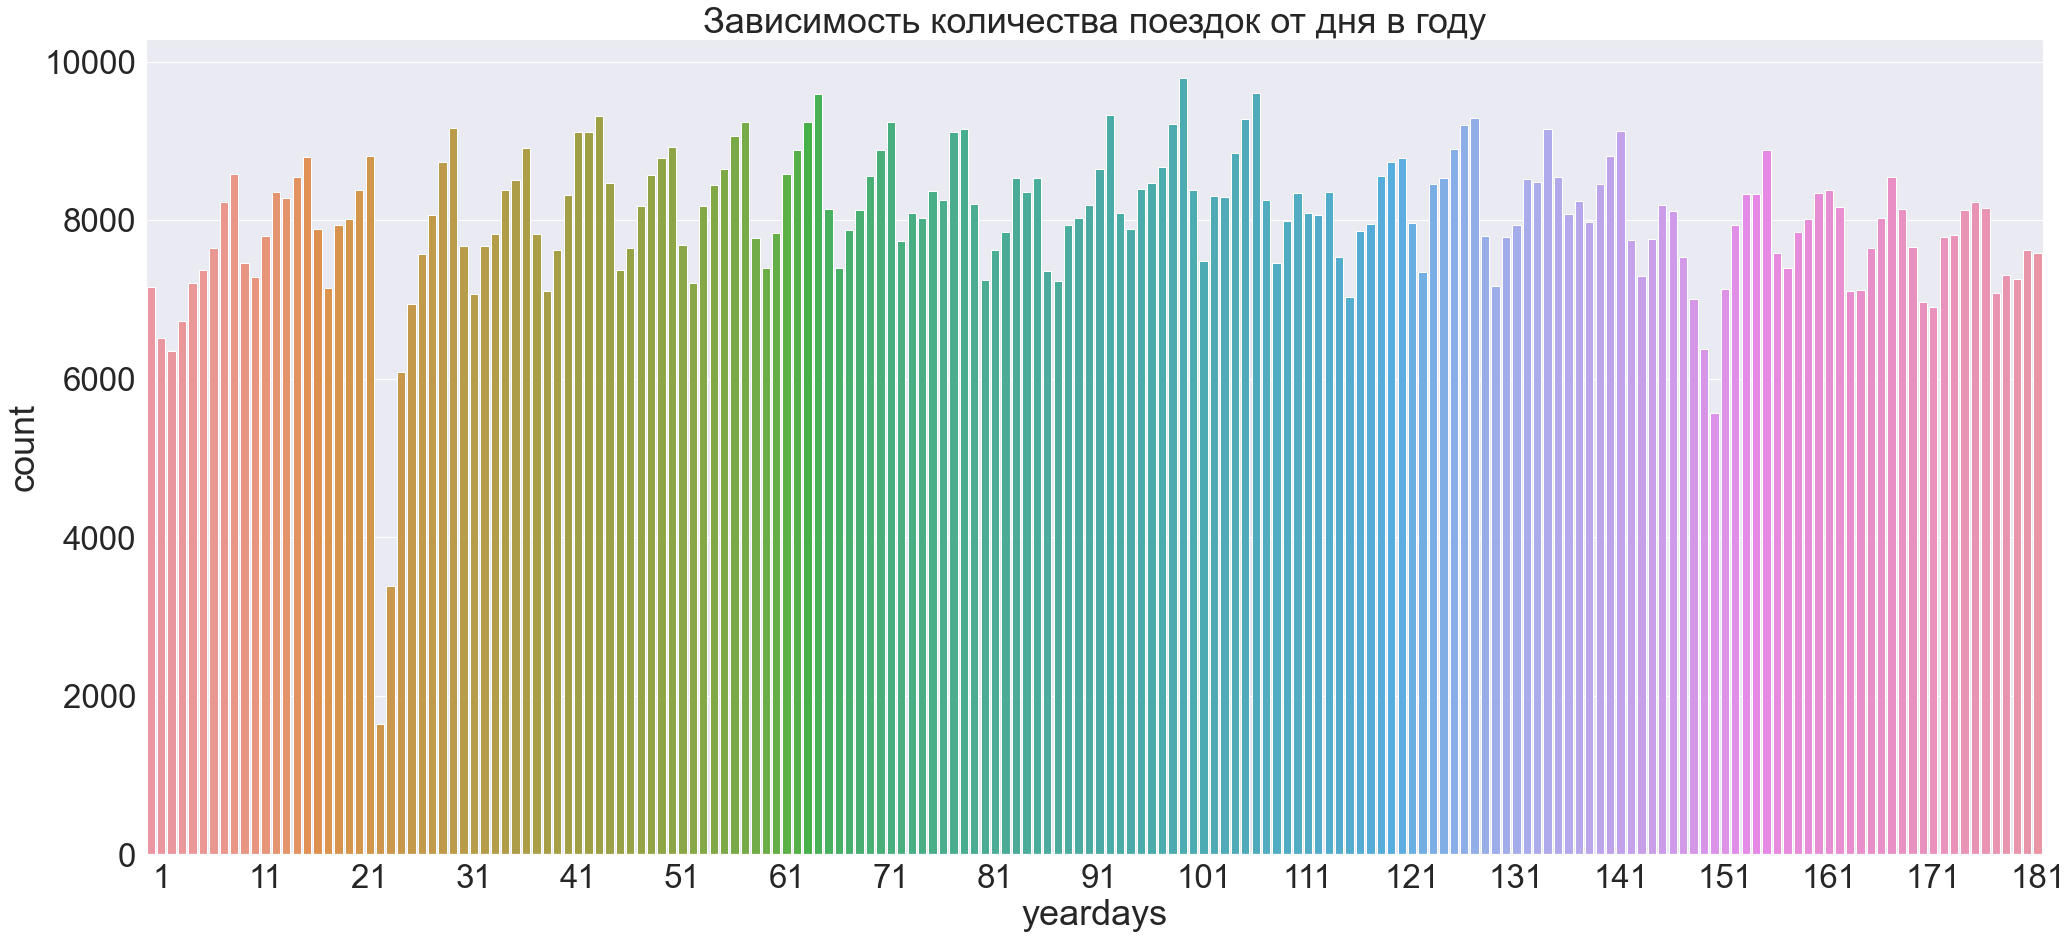

In [ ]:
sns.set(font_scale=3)
plt.figure(figsize=(34,15))
plt.title('Зависимость количества поездок от дня в году')
ax = sns.countplot(days['yeardays'])
ind = [i+1 for i in range(0, 182, 10)]
ax.set(xticks=ind, xticklabels=ind)
plt.show()

Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. 

**(0.1 балл**)Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

In [ ]:
days['yeardays'].value_counts().sort_values(ascending=True).head(20)

23     1648
24     3383
151    5570
25     6084
3      6353
150    6372
2      6512
4      6725
172    6910
26     6941
171    6962
149    7004
116    7028
32     7064
178    7084
39     7110
164    7112
165    7114
152    7131
18     7146
Name: yeardays, dtype: int64

"Провалы": 23-24 и 149-151

In [ ]:
days1.loc[23, 'pickup_datetime']

yeardays
23   2016-01-23 08:46:42
23   2016-01-23 00:06:25
23   2016-01-23 10:38:43
23   2016-01-23 01:16:58
23   2016-01-23 00:19:01
             ...        
23   2016-01-23 11:36:46
23   2016-01-23 01:08:39
23   2016-01-23 03:14:57
23   2016-01-23 00:47:43
23   2016-01-23 02:57:21
Name: pickup_datetime, Length: 1648, dtype: datetime64[ns]

In [ ]:
days1.loc[151, 'pickup_datetime']

yeardays
151   2016-05-30 13:33:07
151   2016-05-30 13:08:31
151   2016-05-30 12:13:20
151   2016-05-30 04:01:54
151   2016-05-30 23:02:53
              ...        
151   2016-05-30 02:47:27
151   2016-05-30 16:28:41
151   2016-05-30 03:52:41
151   2016-05-30 14:42:12
151   2016-05-30 03:08:19
Name: pickup_datetime, Length: 5570, dtype: datetime64[ns]

**Ответ**: 23.01.2016 - очень сильная снежная буря\
31.05.2016 - сбой в аэропорту 

**(0.15 баллов)** Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [ ]:
data_time = pd.DataFrame({
    'days': data['pickup_datetime'].apply(lambda x: int(x.weekday())),
    'hours': data['pickup_datetime'].apply(lambda x: float(x.hour)),
    'months': data['pickup_datetime'].apply(lambda x: int(x.month))
})

In [ ]:
trips_in_days = data_time['days'].value_counts()
trips_in_days

4    223533
5    220868
3    218574
2    210136
1    202749
6    195366
0    187418
Name: days, dtype: int64

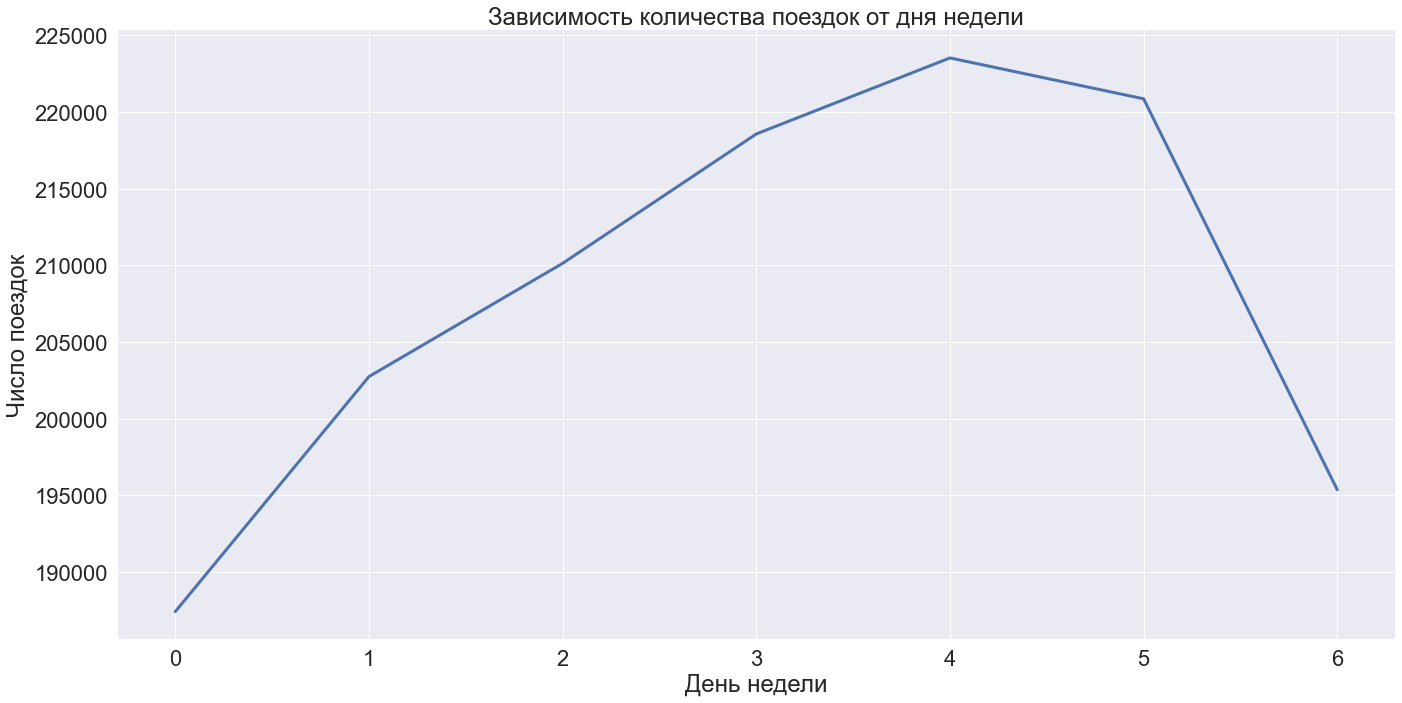

In [ ]:
sns.set(font_scale=2)
ax = sns.relplot(x=trips_in_days.index, y=trips_in_days.values, kind="line", height=10, aspect=2, palette='nipy_spectral', markers=True, linewidth=3).set(ylabel='Число поездок', xlabel='День недели', title="Зависимость количества поездок от дня недели")

In [ ]:
trips_in_hours = data_time['hours'].value_counts()
trips_in_hours

18.0    90600
19.0    90308
21.0    84185
20.0    84072
22.0    80492
17.0    76483
14.0    74292
12.0    71873
15.0    71811
13.0    71473
23.0    69785
11.0    68476
9.0     67663
8.0     67053
10.0    65437
16.0    64313
7.0     55600
0.0     53248
1.0     38571
6.0     33248
2.0     27972
3.0     20895
4.0     15792
5.0     15002
Name: hours, dtype: int64

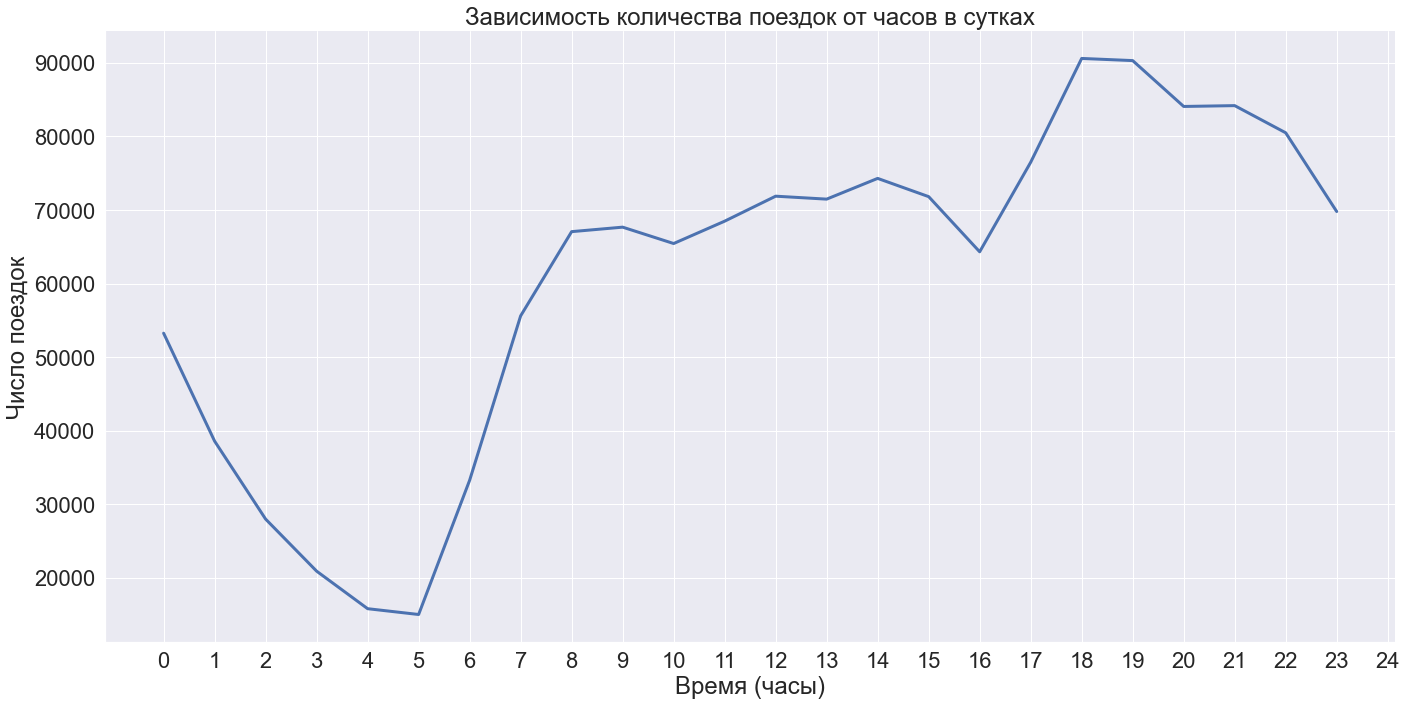

In [ ]:
sns.set(font_scale=2)
ind1 = list(range(25))
ax = sns.relplot(x=trips_in_hours.index, y=trips_in_hours.values, kind="line", height=10, aspect=2, palette='nipy_spectral', markers=True, linewidth=3).set(ylabel='Число поездок', xlabel='Время (часы)', title="Зависимость количества поездок от часов в сутках", xticks=ind1, xticklabels=ind1)



**Задание 3 (1 балл)**. 

* **(0.3 балла)** Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`).
* **(0.3 балла)** Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [ ]:
data_time = pd.DataFrame({
    'days': data['pickup_datetime'].apply(lambda x: int(x.weekday())),
    'hours': data['pickup_datetime'].apply(lambda x: float(x.hour)),
    'months': data['pickup_datetime'].apply(lambda x: int(x.month))
})

In [ ]:
hours_in_months = data_time.groupby('months')['hours'].value_counts()

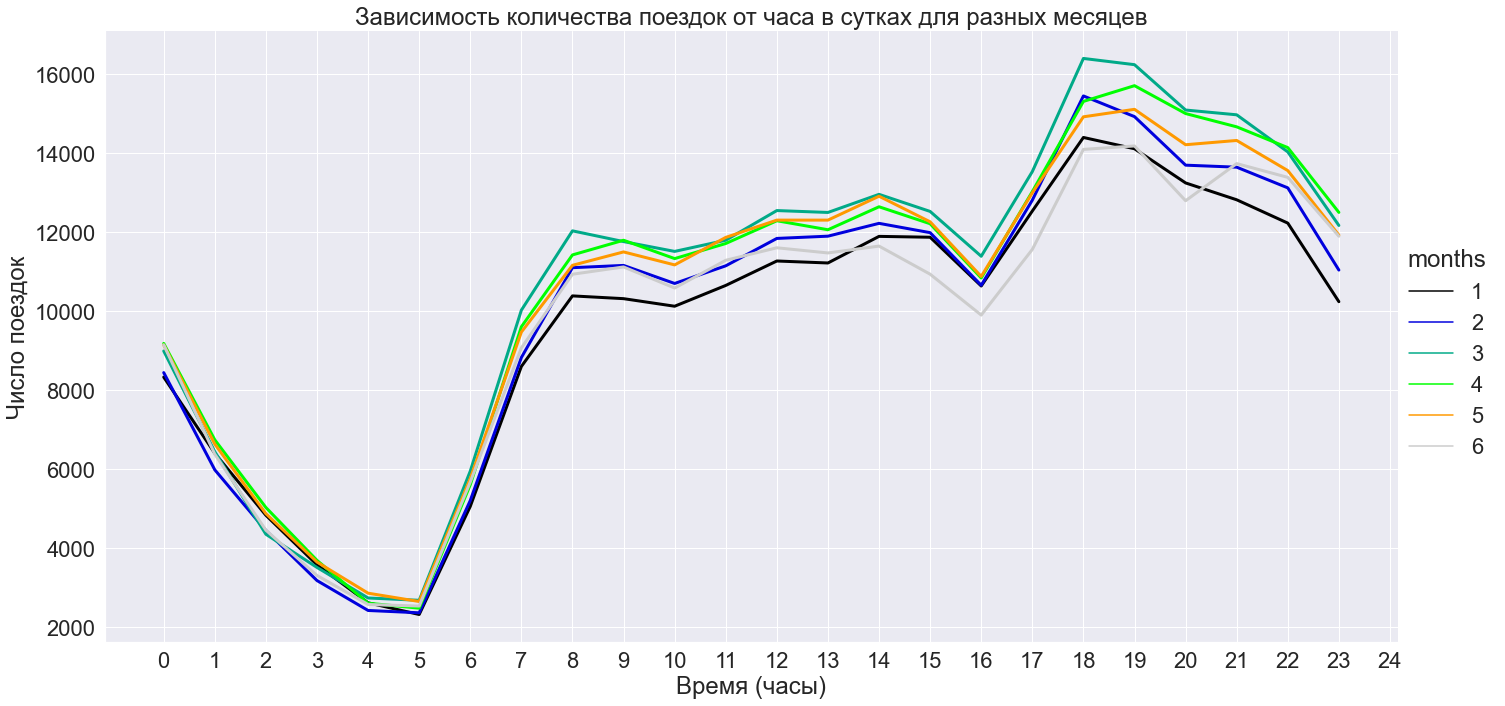

In [ ]:
sns.set(font_scale=2)
ax = sns.relplot(data=hours_in_months, x='hours', y=hours_in_months.values, hue='months', kind="line", height=10, 
                 aspect=2, palette='nipy_spectral', markers=True, linewidth=3).set(ylabel='Число поездок', xlabel='Время (часы)', title="Зависимость количества поездок от часа в сутках для разных месяцев", xticks=ind1, xticklabels=ind1)

In [ ]:
hours_in_days = data_time.groupby('days')['hours'].value_counts()

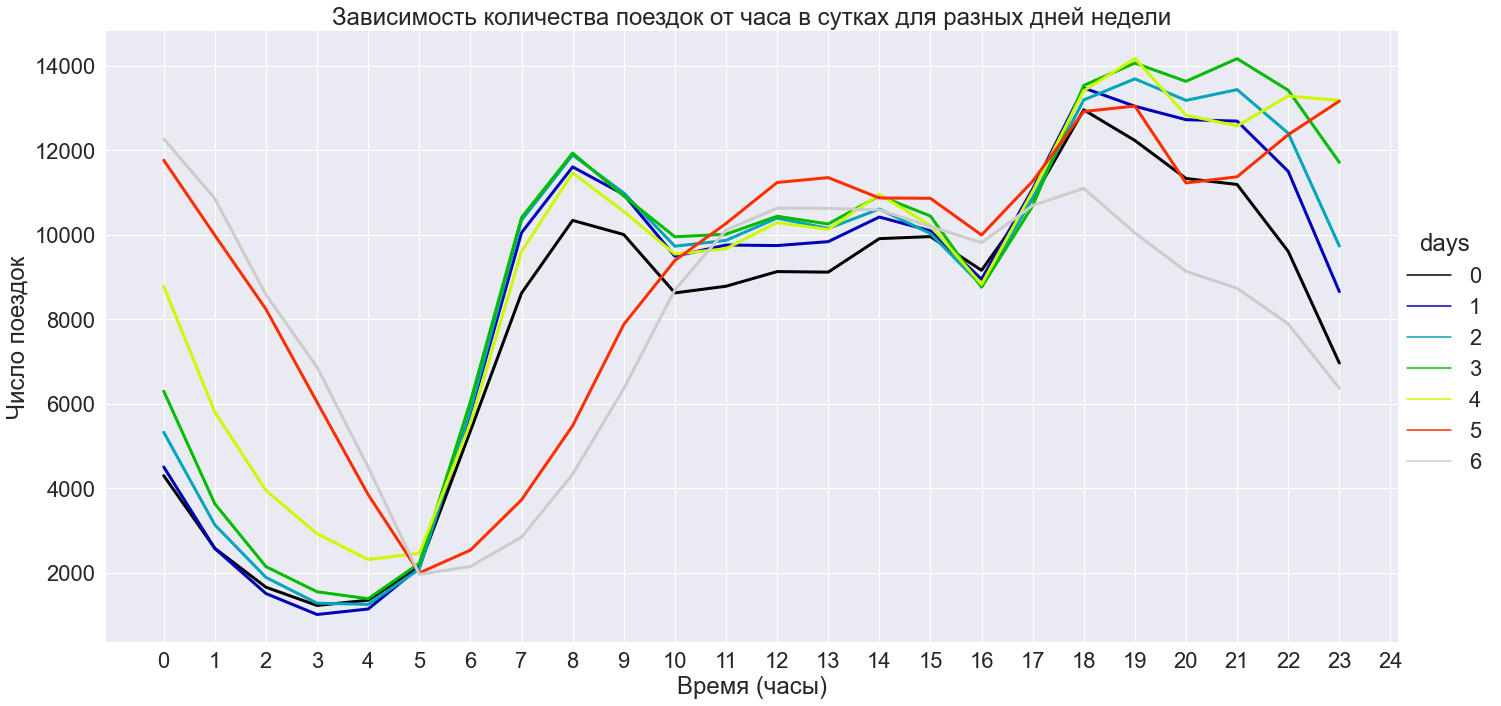

In [ ]:
sns.set(font_scale=2)
ax = sns.relplot(data=hours_in_days, x='hours', y=hours_in_days.values, hue='days', kind="line", height=10, aspect=2, palette='nipy_spectral', markers=True, linewidth=3).set(ylabel='Число поездок', xlabel='Время (часы)', title="Зависимость количества поездок от часа в сутках для разных дней недели", xticks=ind1, xticklabels=ind1)

**Вопрос  (0.4 балла)**: **(?)** Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: 
Меньше всего поездок в 5 часов утра - это связано с тем, что большинство людей в это время находится дома. После этого число поездок начинает возрастать, в 8-9 утра оно достигает максимума за первую половину дня. Самое большое число поездок приходится на 6-7 часов вечера, что логично, потому что люди в это время возвращаются с работы. 
Месяца сильно друг от друга не отличаются по числу поездок, а вот на графике с днями недели отчетливо выделяются выходные: суббота и воскресенье. В эти дни число поездок ночью больше, чем в будние дни, а утром, наоборот, меньше.

**Задание 4 (1 балл)**. 

**(0.1 балл) за каждый пункт**
* Разбейте выборку на обучающую и тестовую в отношении 7:3.
* По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. 
* Затем сделайте то же самое, но для часа в сутках и дня в году.

In [9]:
cop_data = copy(data)

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.3, random_state=10)

In [11]:
big_X_train = copy(X_train)
big_X_train['weekday'] = X_train['pickup_datetime'].apply(lambda x: int(x.weekday()))
big_X_train['hours'] = X_train['pickup_datetime'].apply(lambda x: float(x.hour))
big_X_train['months'] = X_train['pickup_datetime'].apply(lambda x: int(x.month))
big_X_train['yearday'] = X_train['pickup_datetime'].apply(lambda x: int(x.strftime("%j")))

In [ ]:
meanlog_weekday = big_X_train.groupby('weekday')['log_trip_duration'].mean()
meanlog_weekday

weekday
0    6.427285
1    6.489661
2    6.512748
3    6.529166
4    6.500187
5    6.418129
6    6.377524
Name: log_trip_duration, dtype: float64

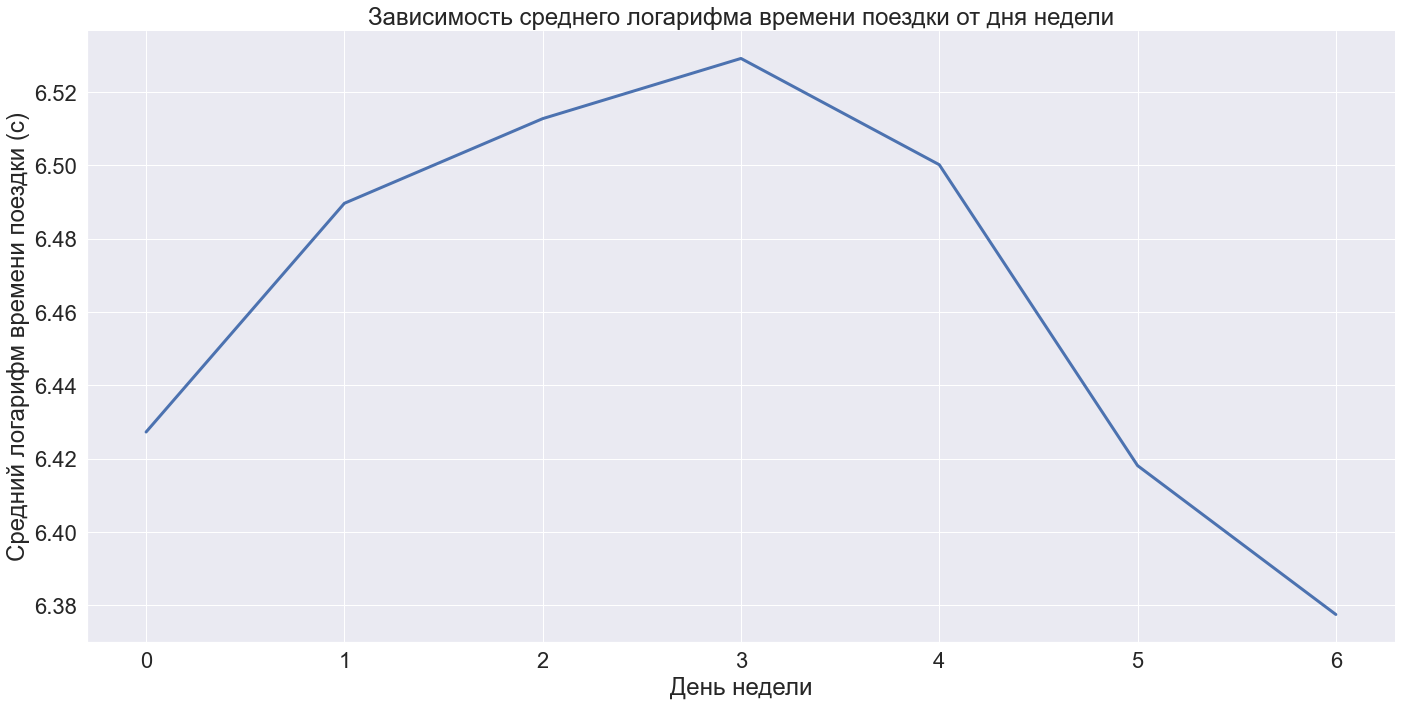

In [ ]:
sns.set(font_scale=2)
ax = sns.relplot(x=meanlog_weekday.index, y=meanlog_weekday.values, kind="line", height=10, aspect=2, palette='nipy_spectral', markers=True, linewidth=3).set(ylabel='Средний логарифм времени поездки (с)', xlabel='День недели', title="Зависимость среднего логарифма времени поездки от дня недели")



In [ ]:
meanlog_yearday = big_X_train.groupby('yearday')['log_trip_duration'].mean()
meanlog_yearday

yearday
1      6.330319
2      6.320347
3      6.322156
4      6.314502
5      6.352638
         ...   
178    6.459784
179    6.477398
180    6.500735
181    6.530312
182    6.564226
Name: log_trip_duration, Length: 182, dtype: float64

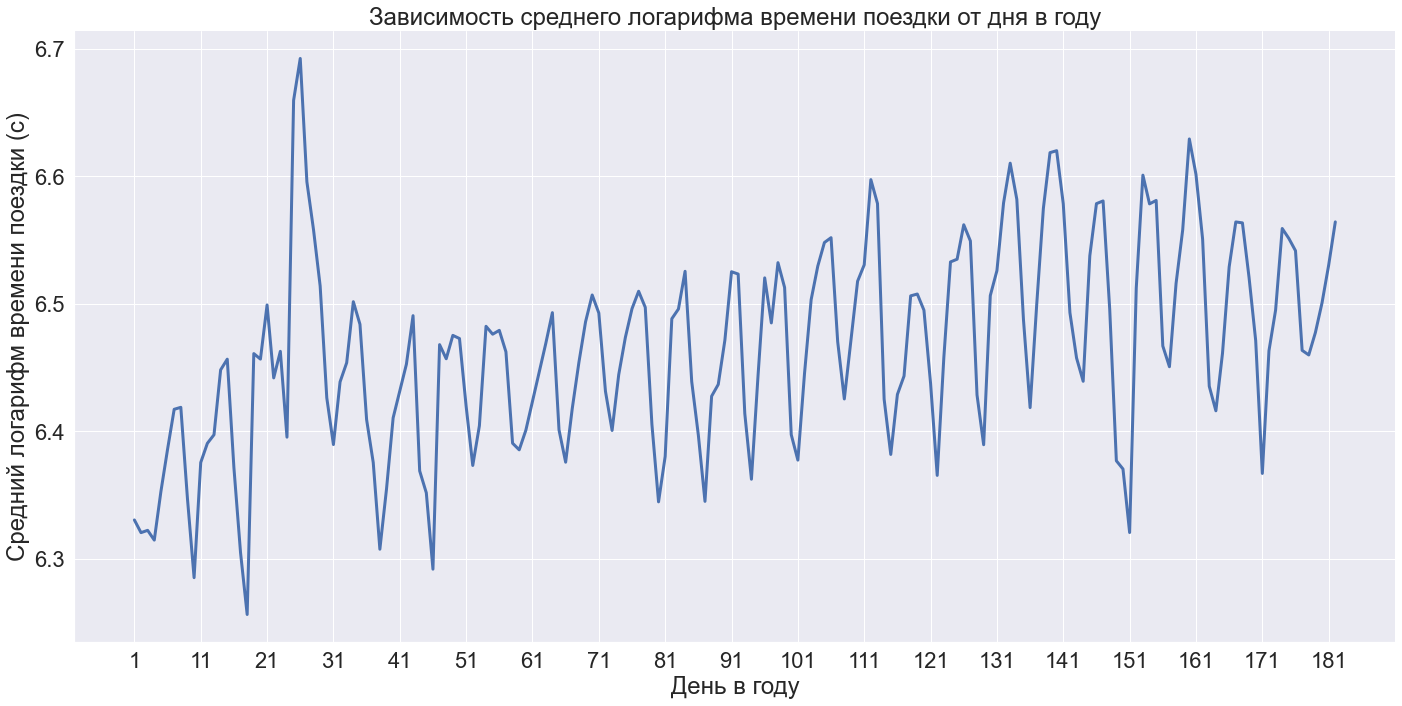

In [ ]:
sns.set(font_scale=2)
ax = sns.relplot(x=meanlog_yearday.index, y=meanlog_yearday.values, kind="line", height=10, aspect=2, palette='nipy_spectral', markers=True, linewidth=3).set(ylabel='Средний логарифм времени поездки (с)', xlabel='День в году', title="Зависимость среднего логарифма времени поездки от дня в году", xticks=ind, xticklabels=ind)


In [ ]:
meanlog_hour = big_X_train.groupby('hours')['log_trip_duration'].mean()
meanlog_hour

hours
0.0     6.421890
1.0     6.371103
2.0     6.324450
3.0     6.314438
4.0     6.318426
5.0     6.233332
6.0     6.186998
7.0     6.350152
8.0     6.463914
9.0     6.481255
10.0    6.485540
11.0    6.519263
12.0    6.524078
13.0    6.538514
14.0    6.566747
15.0    6.573642
16.0    6.543344
17.0    6.539122
18.0    6.506053
19.0    6.440682
20.0    6.417836
21.0    6.433825
22.0    6.467608
23.0    6.463273
Name: log_trip_duration, dtype: float64

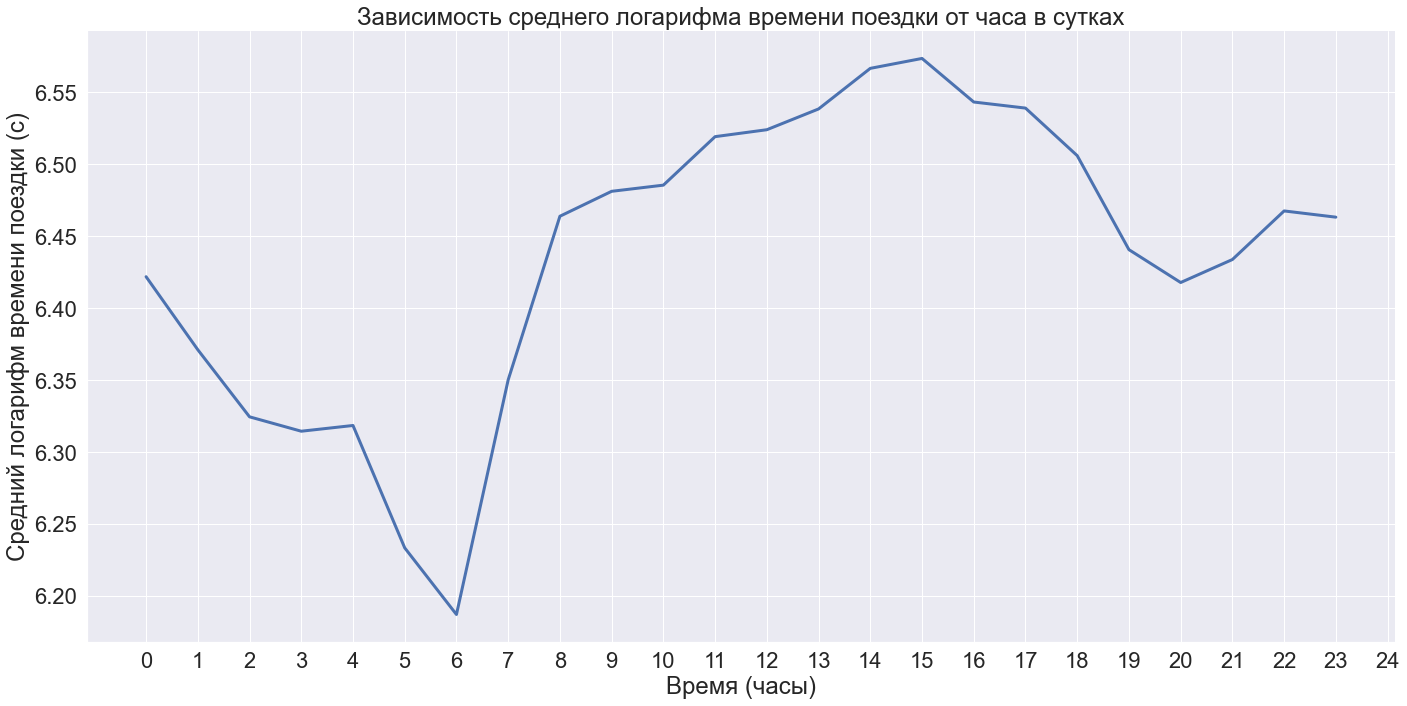

In [ ]:
sns.set(font_scale=2)
ax = sns.relplot(x=meanlog_hour.index, y=meanlog_hour.values, kind="line", height=10, aspect=2, palette='nipy_spectral', markers=True, linewidth=3).set(ylabel='Средний логарифм времени поездки (с)', xlabel='Время (часы)', title="Зависимость среднего логарифма времени поездки от часа в сутках", xticks=ind1, xticklabels=ind1)


**Вопрос (0.3 балла)**: **(?)**Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: 
Да, похожи, потому что логарифм не влияет на локальные экстремумы и на монотонность функции.\
В аномальные периоды таргет достигает локального минимума. Это происходит из-за неблагоприятных ситуаций, которые были обозначены выше.\
На графике зависимости логарифма от дня в году заметно, что длительность поездок больше летом, чем зимой, что объяснимо, например, более длинным световым днем. 

**(0.1 балл)**
Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [135]:
import warnings
warnings.simplefilter("ignore")
X_train['weekday'] = X_train['pickup_datetime'].apply(lambda x: int(x.weekday()))
X_train['months'] = X_train['pickup_datetime'].apply(lambda x: int(x.month))
X_train['hours'] = X_train['pickup_datetime'].apply(lambda x: float(x.hour))
X_train['yearday'] = X_train['pickup_datetime'].apply(lambda x: int(x.strftime("%j")))
X_train['first_abnorm'] = X_train['yearday'].apply(lambda x: x == 23 or x == 24)
X_train['second_abnorm'] = X_train['yearday'].apply(lambda x: x == 149 or x == 150 or x == 151)

Итак, мы уже создали некоторое количество признаков.

**Вопрос (0.3 балла)**: **(?)**Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ**: 
Как категориальные имеет смысл рассматривать аномальность периода, день недели и время суток. Аномальность периода - очевидно (принимает 2 значения, True и False). День недели - в целом дни разбиваются на 2 категории, будни и выходные. Время суток: каждый час длительность поездки разная, она зависит от того, чем люди заняты в это время: рабочий ли это день, едут ли они куда-то.\
Численные признаки: день в году и месяц. Потому что к категориальным их отнести сложно (а еще проверено опытным путем, что при их отнесении к категориальным точность упадет).

**Задание 5 (1.5 балла)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [136]:
X_test['weekday'] = X_test['pickup_datetime'].apply(lambda x: int(x.weekday()))
X_test['months'] = X_test['pickup_datetime'].apply(lambda x: int(x.month))
X_test['hours'] = X_test['pickup_datetime'].apply(lambda x: float(x.hour))
X_test['yearday'] = X_test['pickup_datetime'].apply(lambda x: int(x.strftime("%j")))
X_test['first_abnorm'] = X_test['yearday'].apply(lambda x: x == 23 or x == 24)
X_test['second_abnorm'] = X_test['yearday'].apply(lambda x: x == 149 or x == 150 or x == 151)

In [137]:
y_train = X_train['log_trip_duration']
X_train = X_train.drop('log_trip_duration', axis=1)
y_test = X_test['log_trip_duration']
X_test = X_test.drop('log_trip_duration', axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

categorical = ['first_abnorm', 'second_abnorm','hours', 'weekday']
numeric_features = ['yearday', 'months', 'dropoff_latitude', 'dropoff_longitude', 'pickup_latitude', 'pickup_longitude']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('classifier', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
print("MSE =", mean_squared_error(y_test, y_pred1))

MSE = 0.5933897180262245


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [ ]:
show_circles_on_map(X_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(X_train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

**Ответ**: Newark Liberty International Airport, John F. Kennedy International Airport

**Задание 6 (0.75 балл)**. 

**(0.3 балла)** Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [18]:
pip install haversine

In [138]:
import haversine
from haversine import haversine_vector
haver1 = haversine_vector([(X_train['pickup_latitude'], X_train['pickup_longitude'])], [(X_train['dropoff_latitude'], X_train['dropoff_longitude'])])
haver2 = haversine_vector([(X_test['pickup_latitude'], X_test['pickup_longitude'])], [(X_test['dropoff_latitude'], X_test['dropoff_longitude'])])

In [139]:
X_train['haversine'] = haver1.T
X_test['haversine'] = haver2.T

**(0.25 балла)** Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [140]:
X_train['log_haversine'] = np.log1p(X_train['haversine'])
X_test['log_haversine'] = np.log1p(X_test['haversine'])

**(0.2 балла)** Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [ ]:
np.corrcoef(X_train['haversine'], y_train)

array([[1.        , 0.56551235],
       [0.56551235, 1.        ]])

In [ ]:
np.corrcoef(X_train['log_haversine'], y_train)

array([[1.        , 0.74981542],
       [0.74981542, 1.        ]])

**Задание 7 (0.75 балла)**. 

**(0.2 балла)** Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [141]:
mean_speed = X_train['haversine'] / np.expm1(y_train)

[Text(0.5, 1.0, 'Распределение средней скорости')]

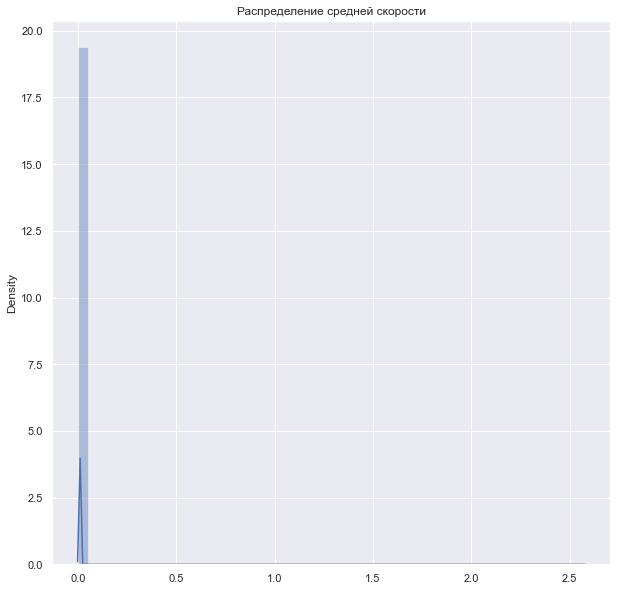

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.distplot(x=mean_speed).set(title="Распределение средней скорости")

**(0.1 балл)** Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [142]:
filt_mean_speed = mean_speed[mean_speed <= np.quantile(mean_speed, 0.95)]

[Text(0.5, 1.0, 'Распределение отфильтрованной средней скорости')]

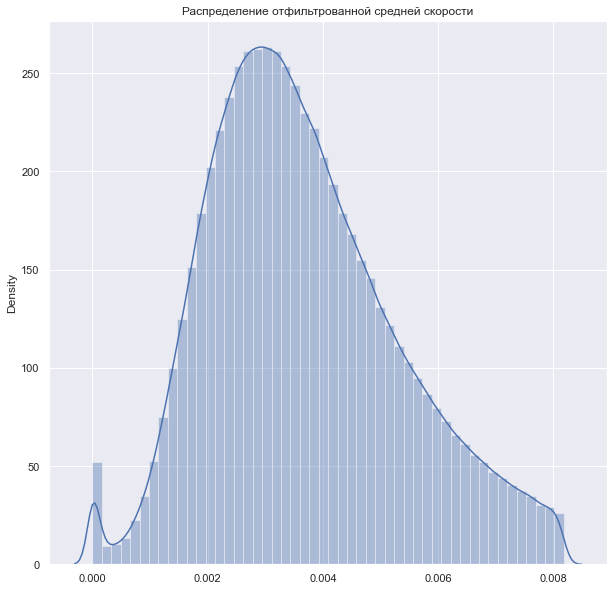

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.distplot(x=filt_mean_speed).set(title="Распределение отфильтрованной средней скорости")

**(0.1 балл)** Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [143]:
X_train['mean_speed'] = mean_speed

In [144]:
import statistics

Med = np.zeros((7, 24))

for i in range(7):
    for j in range(24):
        Med[i][j] = statistics.median(X_train[np.logical_and(X_train['weekday'] == i, X_train['hours'] == j)]['mean_speed'])

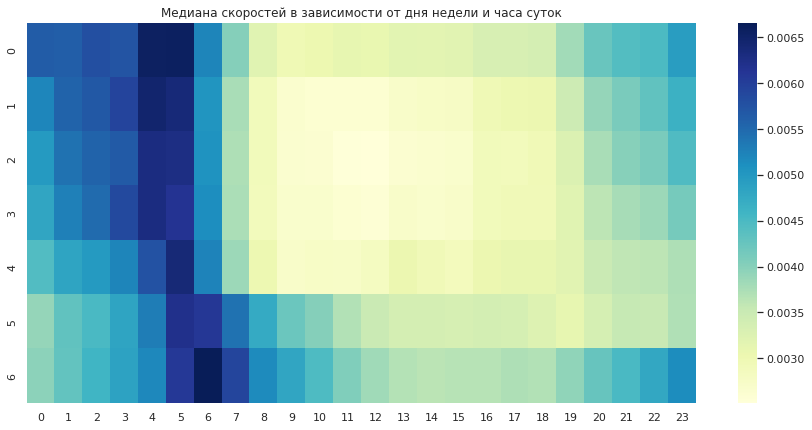

In [145]:
plt.figure(figsize = (15,7))
plt.title('Медиана скоростей в зависимости от дня недели и часа суток')
sns.heatmap(Med, cmap="YlGnBu")

In [146]:
X_train = X_train.drop('mean_speed', 1)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос (0.1 балл)**: **(?)** Почему значение скорости нельзя использовать во время обучения?

**Ответ**: 
Потому что есть объекты с очень большой скоростью (выбросы), что может плохо сказаться на результате обучения.

**Вопрос (0.1 балл)**: **(?)** Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: 
Скорость минимальна в период с понедельника по пятницу, примерно с 9 до 15 часов. Максимальна примерно с 3 до 5 часов в будни и с 5 до 7 часов в выходные дни.



**(0.15 балл)** Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [147]:
X_train['traffics'] = (X_train['hours'] >= 9) & (X_train['hours'] <= 15)
X_test['traffics'] = (X_test['hours'] >= 9) & (X_test['hours'] <= 15)
X_train['free_road'] = ((X_train['weekday'] <= 4) & ((X_train['hours'] >= 3) | (X_train['hours'] <= 5))) | ((X_train['weekday'] >= 5) & ((X_train['hours'] >= 5) | (X_train['hours'] <= 7)))
X_test['free_road'] = ((X_test['weekday'] <= 4) & ((X_test['hours'] >= 3) | (X_test['hours'] <= 5))) | ((X_test['weekday'] >= 5) & ((X_test['hours'] >= 5) | (X_test['hours'] <= 7)))

**Задание 8 (0.25 балла)**. 

**(0.05 балла)** Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [148]:
newark_airport = (40.69, -74.17)
kennedy_airport = (40.64, -73.78)
X_train['newark_start'] = (abs(X_train['pickup_latitude'] - newark_airport[0]) < 0.01) & (abs(X_train['pickup_longitude'] - newark_airport[1]) < 0.01)
X_train['newark_finish'] = (abs(X_train['dropoff_latitude'] - newark_airport[0]) < 0.01) & (abs(X_train['dropoff_longitude'] - newark_airport[1]) < 0.01)
X_train['kennedy_start'] = (abs(X_train['pickup_latitude'] - kennedy_airport[0]) < 0.01) & (abs(X_train['pickup_longitude'] - kennedy_airport[1]) < 0.01)
X_train['kennedy_finish'] = (abs(X_train['dropoff_latitude'] - kennedy_airport[0]) < 0.01) & (abs(X_train['dropoff_longitude'] - kennedy_airport[1]) < 0.01)

**(0.1 балл)** Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

[Text(0.5, 1.0, 'Распределение логарифма времени поездки, если она началась в аэропорту Ньюарк')]

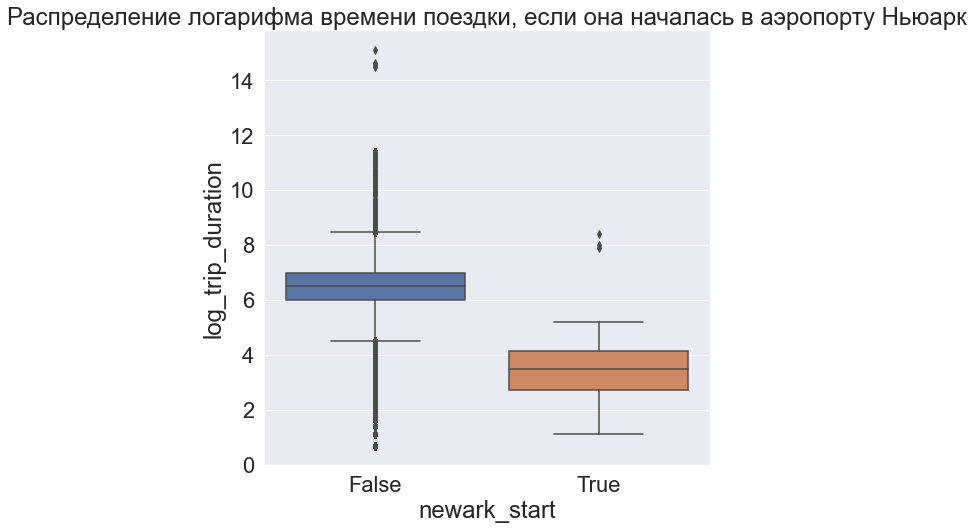

In [ ]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.boxplot(X_train['newark_start'], y_train).set(title='Распределение логарифма времени поездки, если она началась в аэропорту Ньюарк')

[Text(0.5, 1.0, 'Распределение логарифма времени поездки, если она закончилась в аэропорту Ньюарк')]

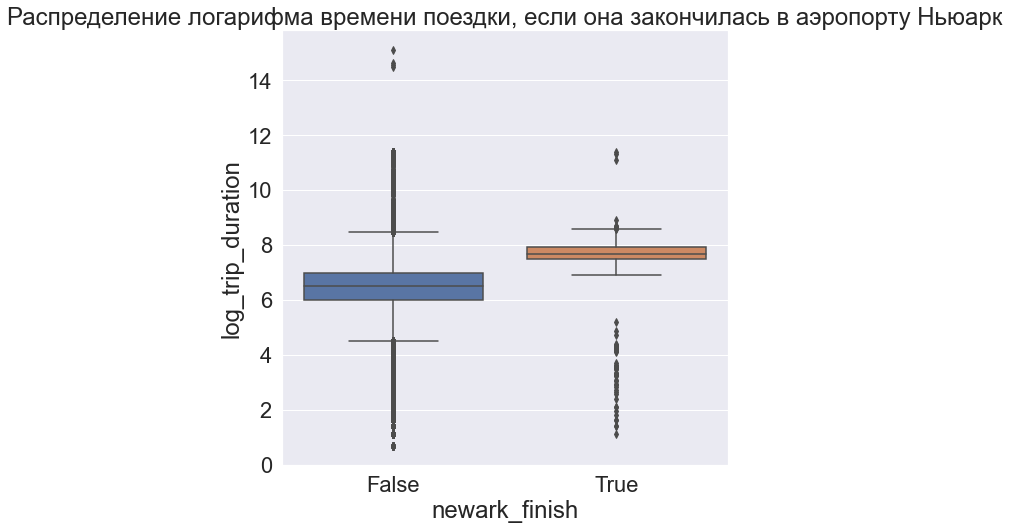

In [ ]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.boxplot(X_train['newark_finish'], y_train).set(title='Распределение логарифма времени поездки, если она закончилась в аэропорту Ньюарк')

[Text(0.5, 1.0, 'Распределение логарифма времени поездки, если она началась в аэропорту Джона Кеннеди')]

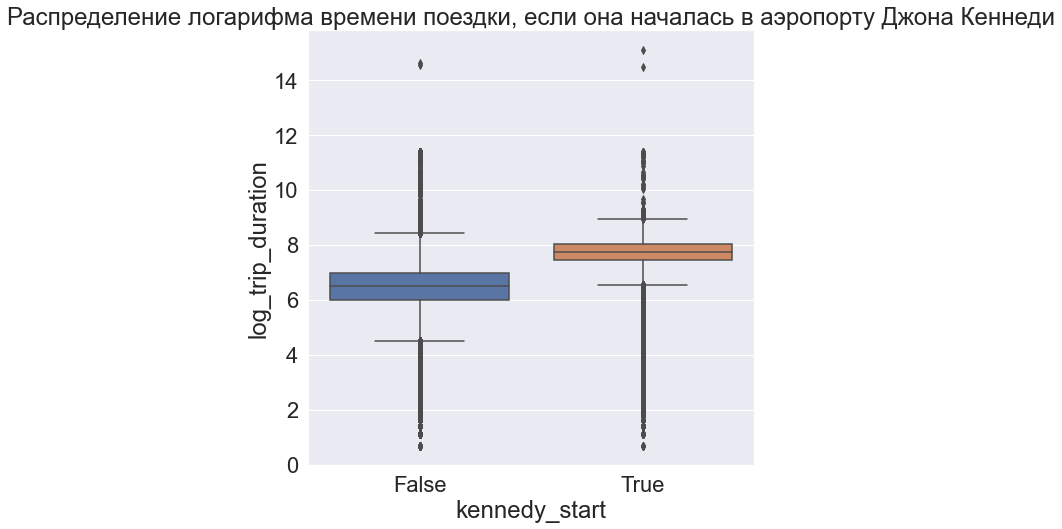

In [ ]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.boxplot(X_train['kennedy_start'], y_train).set(title='Распределение логарифма времени поездки, если она началась в аэропорту Джона Кеннеди')

[Text(0.5, 1.0, 'Распределение логарифма времени поездки, если она закончилась в аэропорту Джона Кеннеди')]

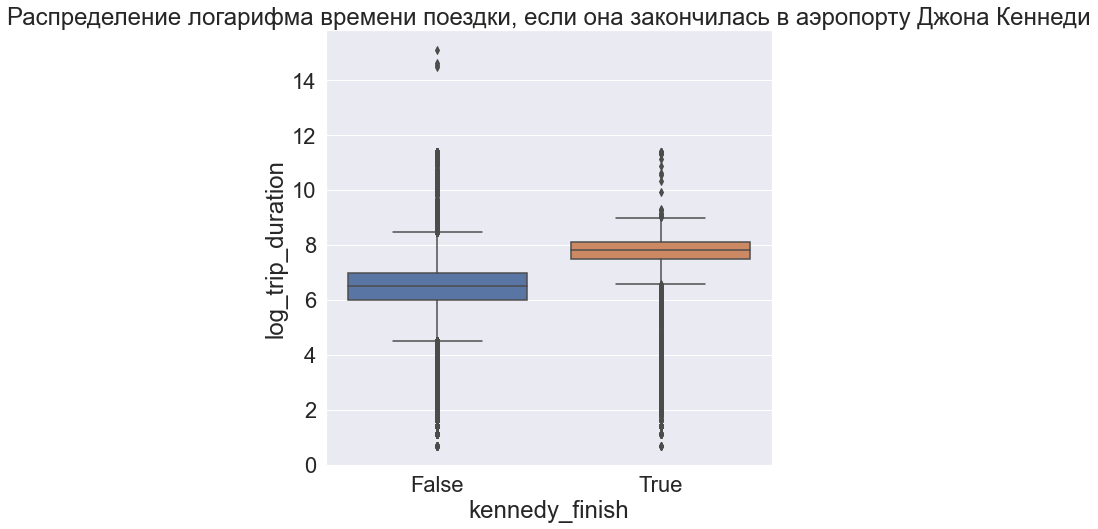

In [ ]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.boxplot(X_train['kennedy_finish'], y_train).set(title='Распределение логарифма времени поездки, если она закончилась в аэропорту Джона Кеннеди')

**Вопрос (0.1 балл)**: **(?)** судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: Признаки получились не очень хорошими, поскольку графики свидетельствуют о большом количестве выбросов. Относительно неплохим получился признак "старт из Ньюарка"


<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, left_angle=None, right_angle=None, m = 4, n = 3):
        self.left_angle = left_angle
        self.right_angle = right_angle
        self.X = None
        self.start_longitude = None
        self.start_latitude = None
        self.stop_longitude = None
        self.stop_latitude = None
        self.m = m
        self.n = n
        self.start = None
        self.stop = None
        return self

    def __fit__(X):
        self.X = copy(X)
        self.start = np.zeros(X.shape)
        self.stop = np.zeros(X.shape)
        self.start_longitude = X['pickup_longitude']
        self.stop_longitude = X['dropoff_longitude']
        self.start_latitude = X['pickup_latitude']
        self.stop_latitude = X['dropoff_latitude']
        if self.left_angle is None:
            min_long = min(min(self.start_longtitude), min(self.stop_longitude))
            min_lat = min(min(self.start_latitude), min(self.stop_latitude))
            self.left_angle = np.array([min_lat, min_long])
        if self.right_angle is None:
            max_long = max(max(self.start_longtitude), max(self.stop_longitude))
            max_lat = max(max(self.start_latitude), max(self.stop_latitude))
            self.right_angle = np.array([max_lat, max_long])
        
        
    def get_features(self):
        return self.start, self.stop


        

        
        
    


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту, закодировав категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`.

In [20]:
X_test['newark_start'] = (abs(X_test['pickup_latitude'] - newark_airport[0]) < 0.01) & (abs(X_test['pickup_longitude'] - newark_airport[1]) < 0.01)
X_test['newark_finish'] = (abs(X_test['dropoff_latitude'] - newark_airport[0]) < 0.01) & (abs(X_test['dropoff_longitude'] - newark_airport[1]) < 0.01)
X_test['kennedy_start'] = (abs(X_test['pickup_latitude'] - kennedy_airport[0]) < 0.01) & (abs(X_test['pickup_longitude'] - kennedy_airport[1]) < 0.01)
X_test['kennedy_finish'] = (abs(X_test['dropoff_latitude'] - kennedy_airport[0]) < 0.01) & (abs(X_test['dropoff_longitude'] - kennedy_airport[1]) < 0.01)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

categorical = ['first_abnorm', 'second_abnorm','hours', 'weekday', 'newark_start', 'newark_finish', 'kennedy_start', 'kennedy_finish', 'traffics', 'free_road']
numeric_features = ['yearday', 'months', 'haversine', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('classifier', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
print("MSE =", mean_squared_error(y_test, y_pred2))

MSE = 0.23633448136453156


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. 

У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос (0.1 балл)**: **(?)** Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: \
vendor_id - у какого-то из этих значений может быть больше длительность поездки, потому что это хорошая фирма и люди пользуются ее услугами для поездок на большие расстояния\
passenger_count - вероятно, большая группа людей вряд ли поедет на такси куда-то далеко, они выберут другой способ добраться до нужного места\
store_and_fwd_flag - если поездка долгая, то, скорее маршрут будет записываться в память, чем передаваться оператору

In [ ]:
X_train.head(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,...,first_abnorm,second_abnorm,haversine,log_haversine,traffics,free_road,newark_start,newark_finish,kennedy_start,kennedy_finish
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,6,...,False,False,3.593845,1.524717,False,True,False,False,False,False
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,4,...,False,False,4.772780,1.753154,False,True,False,False,False,False
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,4,...,False,False,9.514719,2.352776,True,True,False,False,False,False
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,3,...,False,False,1.878367,1.057223,True,True,False,False,False,False
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,3,...,False,False,0.684610,0.521534,True,True,False,False,False,False
121772,id0111855,2,2016-05-09 14:42:03,6,-73.789993,40.643967,-73.987846,40.748131,N,0,...,False,False,20.307208,3.059045,True,True,False,False,True,False
40567,id2525305,1,2016-04-09 17:56:39,1,-74.009048,40.705406,-73.994514,40.750690,N,5,...,False,False,5.182186,1.821672,True,True,False,False,False,False
650192,id0042030,1,2016-03-29 10:33:54,2,-73.982208,40.757610,-73.972107,40.749966,N,1,...,False,False,1.202725,0.789695,True,True,False,False,False,False
119771,id3267762,2,2016-05-14 13:49:53,6,-73.985046,40.722771,-73.962639,40.712429,N,5,...,False,False,2.211039,1.166595,True,True,False,False,False,False
494697,id1783695,2,2016-02-01 22:09:17,3,-73.978363,40.754337,-73.973701,40.787216,N,0,...,False,False,3.676984,1.542653,False,True,False,False,False,False


**(0.1 балл)** Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [ ]:
len(X_train['vendor_id'].value_counts())

2

In [ ]:
len(X_train['passenger_count'].value_counts())

9

In [ ]:
len(X_train['store_and_fwd_flag'].value_counts())

2

**(0.2 балла)** Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

[Text(0.5, 1.0, 'Распределение логарифма времени поездки в зависимости от провайдера')]

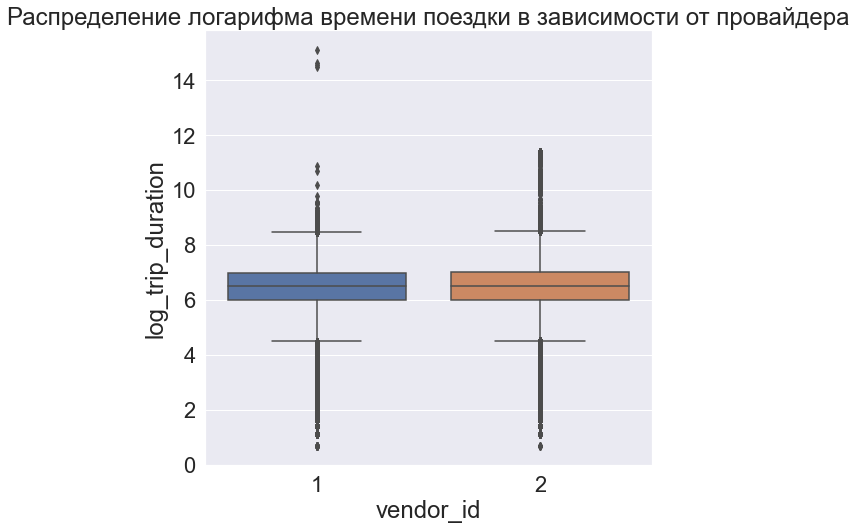

In [ ]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.boxplot(X_train['vendor_id'], y_train).set(title='Распределение логарифма времени поездки в зависимости от провайдера')

[Text(0.5, 1.0, 'Распределение логарифма времени поездки в зависимости от числа пассажиров')]

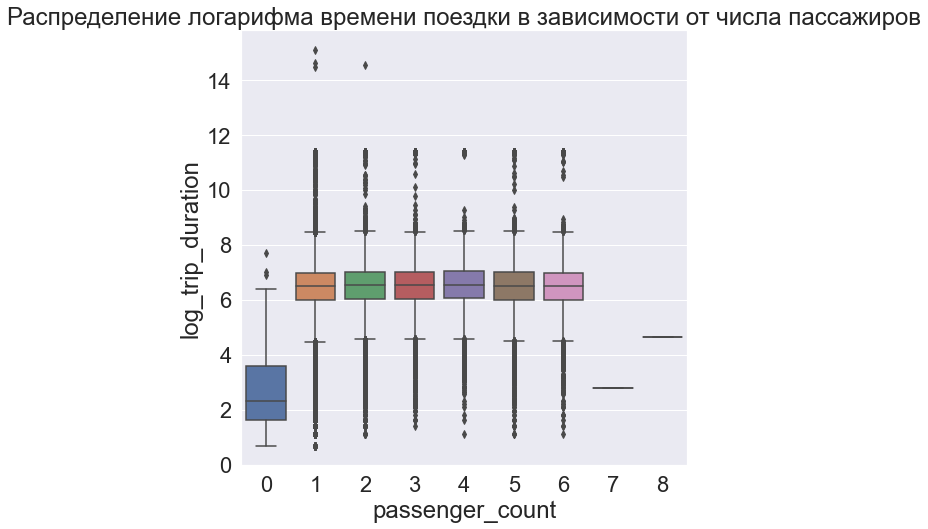

In [ ]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.boxplot(X_train['passenger_count'], y_train).set(title='Распределение логарифма времени поездки в зависимости от числа пассажиров')

[Text(0.5, 1.0, 'Распределение логарифма времени поездки в зависимости от передачи маршрута')]

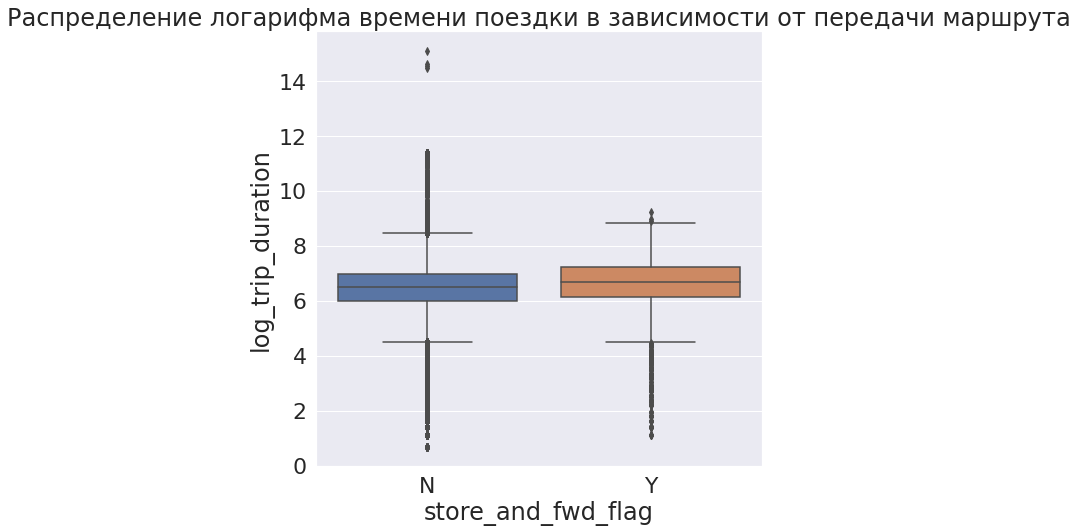

In [149]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.boxplot(X_train['store_and_fwd_flag'], y_train).set(title='Распределение логарифма времени поездки в зависимости от передачи маршрута')

**(0.2 балла)** Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [21]:
X_train['vendor_id'] = X_train['vendor_id'].apply(lambda x: x - 1)
X_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,months,hours,yearday,first_abnorm,second_abnorm,haversine,log_haversine,traffics,free_road,newark_start,newark_finish,kennedy_start,kennedy_finish
824746,id2365163,1,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,6,3,0.0,87,False,False,3.593845,1.524717,False,True,False,False,False,False
645821,id3126187,1,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,4,3,20.0,78,False,False,4.772780,1.753154,False,True,False,False,False,False
691846,id2588127,1,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,4,4,18.0,106,False,False,9.514719,2.352776,False,True,False,False,False,False
1147931,id0915715,1,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,3,3,14.0,84,False,False,1.878367,1.057223,True,True,False,False,False,False
183569,id3758776,0,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,3,4,13.0,119,False,False,0.684610,0.521534,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348317,id2763967,0,2016-05-12 05:16:06,1,-73.996178,40.748222,-73.990967,40.755478,N,3,5,5.0,133,False,False,0.918458,0.651522,False,True,False,False,False,False
1154171,id0853058,0,2016-01-16 19:14:54,1,-73.995415,40.728886,-73.993706,40.744068,N,5,1,19.0,16,False,False,1.694348,0.991156,False,True,False,False,False,False
617841,id2242904,0,2016-03-21 20:11:12,1,-73.960091,40.779701,-73.960136,40.773102,N,0,3,20.0,81,False,False,0.733834,0.550335,False,True,False,False,False,False
1048548,id2558617,0,2016-04-09 09:21:44,1,-73.968124,40.799923,-73.952415,40.818588,N,5,4,9.0,100,False,False,2.460815,1.241504,True,True,False,False,False,False


In [22]:
X_train['store_and_fwd_flag'] = X_train['store_and_fwd_flag'].apply(lambda x: int(x == 'Y'))
X_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,months,hours,yearday,first_abnorm,second_abnorm,haversine,log_haversine,traffics,free_road,newark_start,newark_finish,kennedy_start,kennedy_finish
824746,id2365163,1,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,0,6,3,0.0,87,False,False,3.593845,1.524717,False,True,False,False,False,False
645821,id3126187,1,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,0,4,3,20.0,78,False,False,4.772780,1.753154,False,True,False,False,False,False
691846,id2588127,1,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,0,4,4,18.0,106,False,False,9.514719,2.352776,False,True,False,False,False,False
1147931,id0915715,1,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,0,3,3,14.0,84,False,False,1.878367,1.057223,True,True,False,False,False,False
183569,id3758776,0,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,0,3,4,13.0,119,False,False,0.684610,0.521534,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348317,id2763967,0,2016-05-12 05:16:06,1,-73.996178,40.748222,-73.990967,40.755478,0,3,5,5.0,133,False,False,0.918458,0.651522,False,True,False,False,False,False
1154171,id0853058,0,2016-01-16 19:14:54,1,-73.995415,40.728886,-73.993706,40.744068,0,5,1,19.0,16,False,False,1.694348,0.991156,False,True,False,False,False,False
617841,id2242904,0,2016-03-21 20:11:12,1,-73.960091,40.779701,-73.960136,40.773102,0,0,3,20.0,81,False,False,0.733834,0.550335,False,True,False,False,False,False
1048548,id2558617,0,2016-04-09 09:21:44,1,-73.968124,40.799923,-73.952415,40.818588,0,5,4,9.0,100,False,False,2.460815,1.241504,True,True,False,False,False,False


In [23]:
X_test['store_and_fwd_flag'] = X_test['store_and_fwd_flag'].apply(lambda x: int(x == 'Y'))
X_test['vendor_id'] = X_test['vendor_id'].apply(lambda x: x - 1)

**Вопрос (0.15 балла)**: **(?)** Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**:
скорее всего, не будут, потому что у них большие "усы"

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель **в том числе и на этих трех признаках.** Обучайте `Ridge`-регрессию со стандартными параметрами, закодировав  категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`.

In [ ]:
categorical = ['first_abnorm', 'second_abnorm','hours', 'weekday', 'newark_start', 'newark_finish', 'kennedy_start', 'kennedy_finish', 'traffics', 'free_road', 'vendor_id']
numeric_features = ['yearday', 'months', 'haversine', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('classifier', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred3 = model.predict(X_test)
print("Using vendor_id: MSE =", mean_squared_error(y_test, y_pred3))

Using vendor_id: MSE = 0.23623202091810935


*vendor_id улучшений не дает*

In [ ]:
categorical = ['first_abnorm', 'second_abnorm','hours', 'weekday', 'newark_start', 'newark_finish', 'kennedy_start', 'kennedy_finish', 'traffics', 'free_road', 'passenger_count']
numeric_features = ['yearday', 'months', 'haversine', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('classifier', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred4 = model.predict(X_test)
print("Using passenger_count: MSE =", mean_squared_error(y_test, y_pred4))

Using passenger_count: MSE = 0.236092946217957


*Улучшение есть, но не очень существенное*

In [ ]:
categorical = ['first_abnorm', 'second_abnorm','hours', 'weekday', 'newark_start', 'newark_finish', 'kennedy_start', 'kennedy_finish', 'traffics', 'free_road', 'passenger_count', 'store_and_fwd_flag']
numeric_features = ['yearday', 'months', 'haversine', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('classifier', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred5 = model.predict(X_test)
print("Using store_and_fwd_flag: MSE =", mean_squared_error(y_test, y_pred5))

Using store_and_fwd_flag: MSE = 0.23608925148038898


*store_and_fwd_flag дает небольшое улучшение*

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [24]:
X_train = X_train.drop('vendor_id', 1)
X_test = X_test.drop('vendor_id', 1)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. 

В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. 


**(0.3 балла)** Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

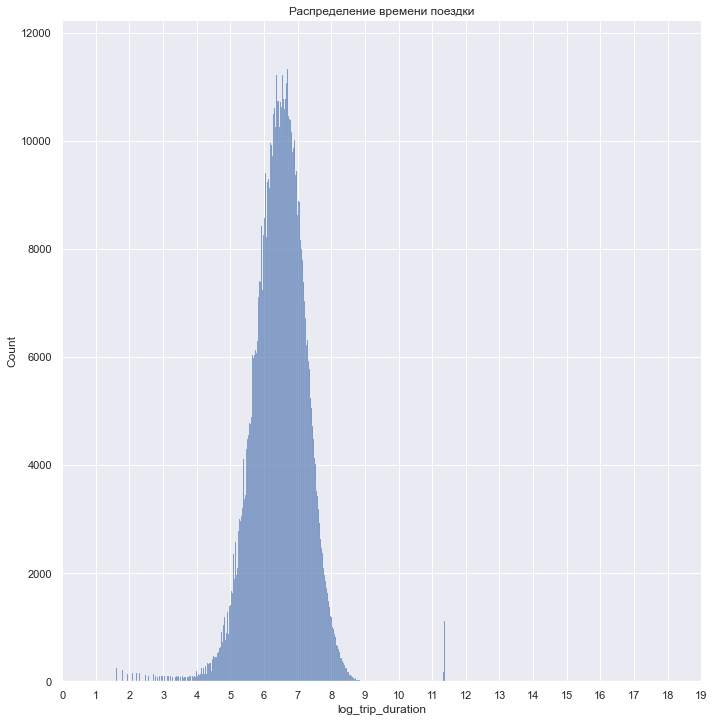

In [ ]:
sns.set(font_scale=1)
ind2 = list(range(20))
sns.displot(y_train, kind='hist', height=10).set(title="Распределение времени поездки", xticks=ind2)

In [101]:
X_train = copy(cop_X_train)
y_train = copy(cop_y_train)

In [102]:
cop_X_train = copy(X_train)
cop_y_train = copy(y_train)
X_train = X_train[y_train > np.quantile(y_train, 0.005)]
y_train = y_train[y_train > np.quantile(y_train, 0.005)]

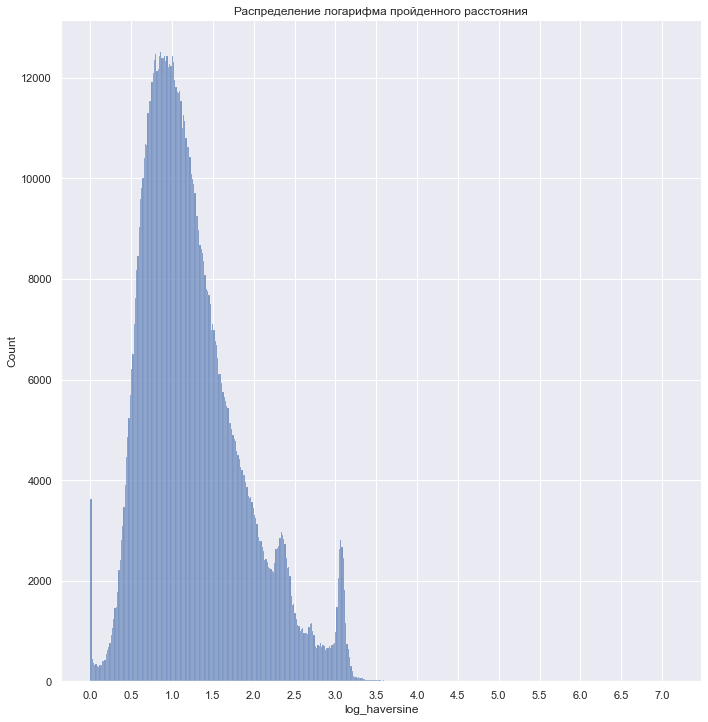

In [ ]:
sns.set(font_scale=1)
ind3 = [i * 0.5 for i in range(15)]
sns.displot(X_train['log_haversine'], kind='hist', height=10).set(title="Распределение логарифма пройденного расстояния", xticks=ind3)

In [103]:
y_train = y_train[X_train['log_haversine'] < np.quantile(X_train['log_haversine'], 0.995)]
X_train = X_train[X_train['log_haversine'] < np.quantile(X_train['log_haversine'], 0.995)]

In [104]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

categorical = ['first_abnorm', 'second_abnorm','hours', 'weekday', 'newark_start', 'newark_finish', 'kennedy_start', 'kennedy_finish', 'traffics', 'free_road', 'passenger_count', 'store_and_fwd_flag']
numeric_features = ['yearday', 'months', 'haversine', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('classifier', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred5 = model.predict(X_train)
print("MSE =", mean_squared_error(y_train, y_pred5))

MSE = 0.20674087206939623


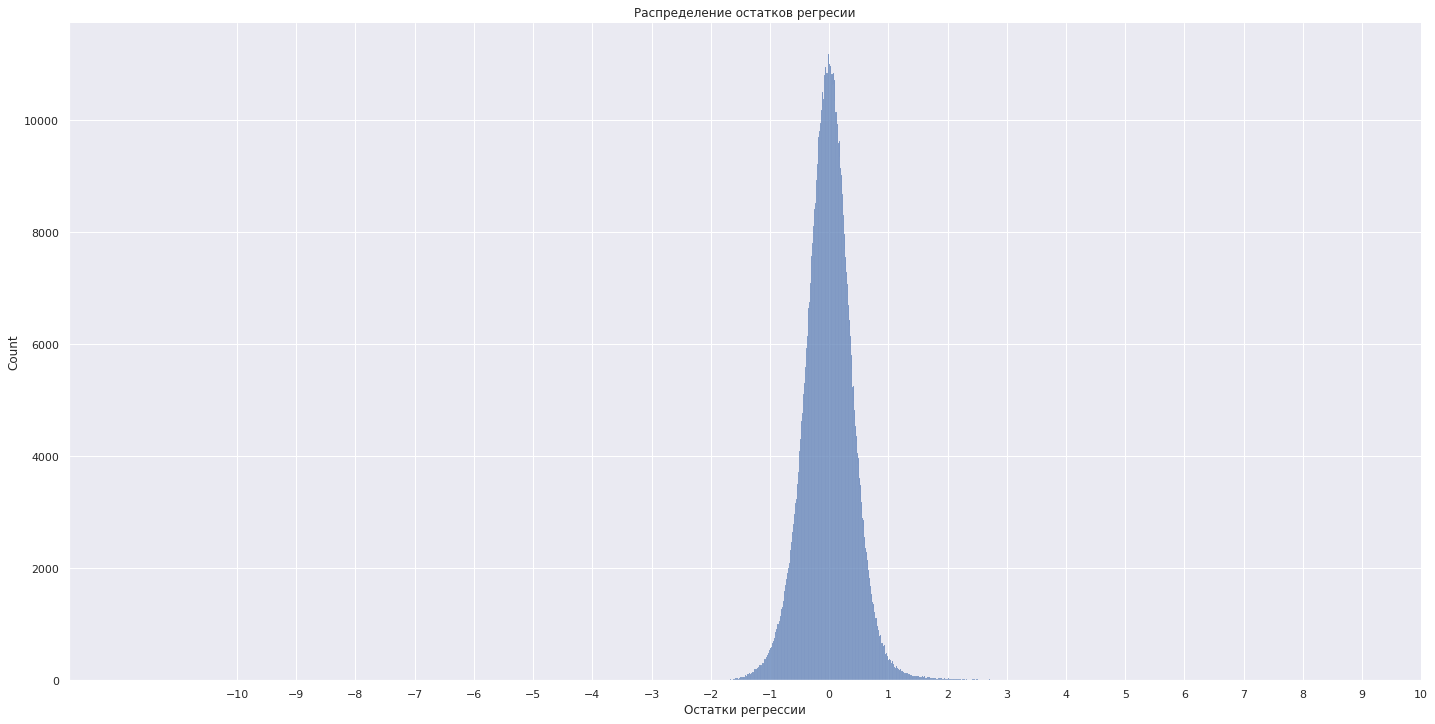

In [92]:
diff = y_train - y_pred5
ind5 = [-10 + i for i in range(21)]
sns.set(font_scale=1)
sns.displot(diff, kind='hist', height=10, aspect=2).set(title="Распределение остатков регресии", xlabel='Остатки регрессии', xticks=ind5)

In [88]:
X_test = copy(cop_X_test)
y_test = copy(cop_y_test)

In [105]:
np.quantile(diff, 0.005), np.quantile(diff, 0.995)

(-1.1712119778929844, 1.5127737831465398)

In [107]:
diff = y_train - y_pred5
X_train = X_train[(diff > np.quantile(diff, 0.005)) & (diff < np.quantile(diff, 0.995))]
y_train= y_train[(diff > np.quantile(diff, 0.005)) & (diff < np.quantile(diff, 0.995))]

**(0.3 балла)** Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [108]:
X_train['hours'].value_counts()

19.0    62238
18.0    62056
21.0    57908
20.0    57865
22.0    55315
17.0    52389
14.0    50891
12.0    49489
15.0    49308
13.0    48953
23.0    47981
11.0    47055
9.0     46291
8.0     46139
10.0    44710
16.0    43960
7.0     38157
0.0     36631
1.0     26576
6.0     22613
2.0     19089
3.0     14282
4.0     10741
5.0     10058
Name: hours, dtype: int64

In [109]:
X_train['weekday'].value_counts()

4    153623
5    151778
3    149776
2    144224
1    139038
6    133546
0    128710
Name: weekday, dtype: int64

In [110]:
X_train['passenger_count'].value_counts()

1    709166
2    144338
5     53599
3     41010
6     33136
4     19438
0         7
8         1
Name: passenger_count, dtype: int64

In [111]:
X_train['passenger_count'] = X_train['passenger_count'].apply(lambda x: 0 if x == 8 else x)

In [112]:
X_train['passenger_count'].value_counts()

1    709166
2    144338
5     53599
3     41010
6     33136
4     19438
0         8
Name: passenger_count, dtype: int64

**(0.4 балла)**Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [113]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

categorical = ['first_abnorm', 'second_abnorm','hours', 'weekday', 'newark_start', 'newark_finish', 'kennedy_start', 'kennedy_finish', 'traffics', 'free_road', 'passenger_count', 'store_and_fwd_flag']
numeric_features = ['yearday', 'months', 'haversine', 'log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('classifier', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred6 = model.predict(X_test)
print("MSE =", mean_squared_error(y_test, y_pred6))

MSE = 0.2388875454570852


**Задание 14 (1 балл)**. 

**(0.1 балл)** После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [115]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1000695, 22)
Size after OneHot: (1000695, 63)


In [116]:
X_train.columns

Index(['id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'weekday', 'months', 'hours', 'yearday',
       'first_abnorm', 'second_abnorm', 'haversine', 'log_haversine',
       'traffics', 'free_road', 'newark_start', 'newark_finish',
       'kennedy_start', 'kennedy_finish'],
      dtype='object')

Получилось 63 признака.

**(0.2 балла)** Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. **(?)** Какой метод лучше?

In [114]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE =", mean_squared_error(y_test, y_pred))

MSE = 0.6309838255365366


**Ответ**:
MSE на Ridge-регрессии существенно лучше, чем на Lasso-регрессии, поэтому Ridge-регрессия лучше подходит в данной ситуации.

**(0.5 балла)** Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) отдельно для `Ridge` и отдельно для `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [117]:
X_train_train, X_valid, y_train_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_train[numeric_features])
X_valid_scaled = scaler.transform(X_valid[numeric_features])

Best alpha = 2.9764


Text(0, 0.5, 'CV score')

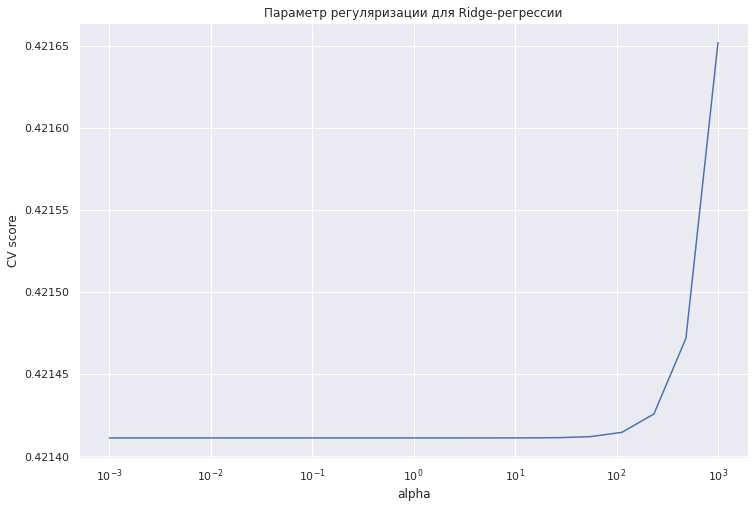

In [124]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_valid_scaled, y_valid)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)
plt.figure(figsize=(12,8))
plt.title("Параметр регуляризации для Ridge-регрессии")
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")



Best alpha = 0.0010


Text(0, 0.5, 'CV score')

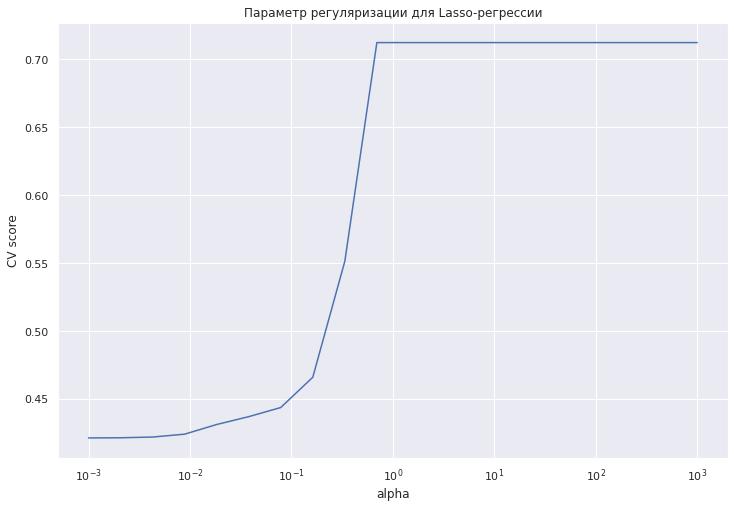

In [123]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3, 3, 20)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_valid_scaled, y_valid)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)
plt.figure(figsize=(12,8))
plt.title("Параметр регуляризации для Lasso-регрессии")
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")


**(0.2 балла)** Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. **(?)** Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [125]:
lasso_zeros = np.array([])
for alpha in alphas:
    lasso_pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha=alpha))
    ])
    model = lasso_pipeline.fit(X_valid, y_valid)
    lasso_zeros = np.append(lasso_zeros, np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0))



Text(0, 0.5, 'n_zeros')

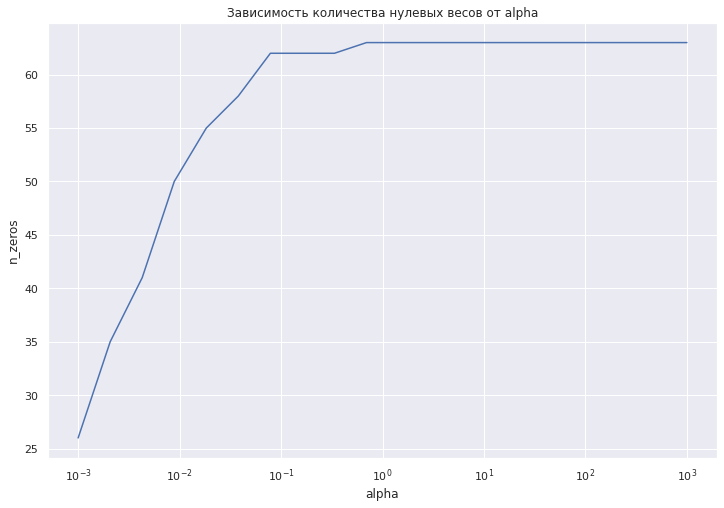

In [126]:
plt.figure(figsize=(12,8))
plt.title("Зависимость количества нулевых весов от alpha")
plt.plot(alphas, lasso_zeros)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("n_zeros")

In [87]:
 X_train.head(1)

,id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,months,hours,yearday,first_abnorm,second_abnorm,haversine,log_haversine,traffics,free_road,newark_start,newark_finish,kennedy_start,kennedy_finish
824746,id2365163,2016-03-27 00:25:29,3,-73.996986,40.74221,-73.98774,40.710659,0,6,3,0.0,87,False,False,3.593845,1.524717,False,True,False,False,False,False


Судя по 2 оследним графикам, обнуление половины признаков не очень сильно скажется на качестве модели

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл + 1 бонус)**. 

**(0.7 баллов)** Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы **(до 1 бонусного балла)**

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Вопрос (0.2 балла)**: **(?)** Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ**:
ВАШ ОТВЕТ ЗДЕСЬ

**(0.1 балл)** Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос (0.2 балла)**: **(?)** Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

**Ответ**:
Манхэттенское расстояние определяется так: $$d =|x_1 - x_2| + |y_1 - y_2|$$. Координаты х и у вычисляются в прямоугольной системе координат, а название идет от улиц Манхэттена, которые параллельны и перпендикулярны друг другу. Помочь оно нам может, потому что все данные приведены как раз для Манхэтена и его окрестностей. 


**(0.5 балла)** Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**(0.3 балла)** Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. **(?)** Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной --- в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Бонус (0.3 балла)** Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

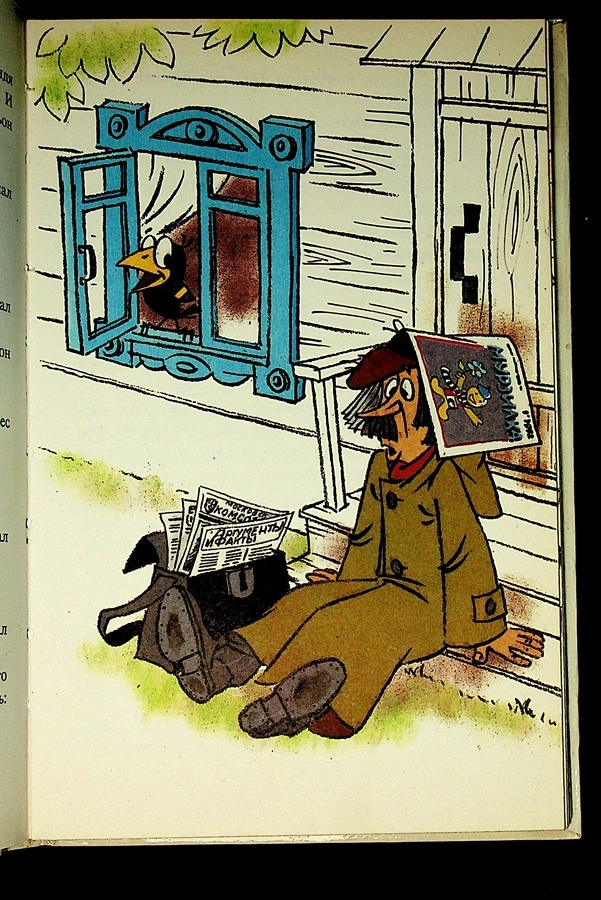

Некоторые фрагменты кода были взяты отсюда: https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/seminars/sem02-sklearn-linregr.ipynb



